In [0]:
!wget https://www.dropbox.com/s/sd6ygbwz8i2x3yn/cartoonset10k.tgz?dl=0

--2019-09-02 19:08:38--  https://www.dropbox.com/s/sd6ygbwz8i2x3yn/cartoonset10k.tgz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sd6ygbwz8i2x3yn/cartoonset10k.tgz [following]
--2019-09-02 19:08:39--  https://www.dropbox.com/s/raw/sd6ygbwz8i2x3yn/cartoonset10k.tgz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca1392fce8233443426ce3215e9.dl.dropboxusercontent.com/cd/0/inline/An1ub7Zoqx2lm462MWDqNPWlK7CzC3eIwGaIGx2CI9bpHkYOvEntlzuY6e8oW93o71Kbo7-Y08S0o7Ra40MGW5bZrTItTuOxpf1Mm2HEUls94UdVibJNNUOkCc9AuTeFFIw/file# [following]
--2019-09-02 19:08:39--  https://uca1392fce8233443426ce3215e9.dl.dropboxusercontent.com/cd/0/inline/An1ub7Zoqx2lm462MWDqNPWlK7CzC3eIwGaIGx2CI9bpHkYOvEntlzuY6e8oW93o71Kbo7-Y08S0o7Ra40MGW5bZrTI

In [0]:
!tar -xf cartoonset10k.tgz?dl=0

In [0]:
!ls

 cartoonset10k	'cartoonset10k.tgz?dl=0'   sample_data


In [0]:
import os
from keras.preprocessing import image
from pathlib import Path
from keras import initializers

Using TensorFlow backend.


In [0]:

folders=os.listdir("cartoonset10k")
P=Path("cartoonset10k/")
dirs=P.glob("*.png")
print(folders)
img_data=[]
img_paths=[]
cnt=0
for img_path in dirs:
  img=image.load_img(img_path,target_size=(64,64))
  img_d=image.img_to_array(img)
  img_data.append(img_d)
  cnt+=1  
print(cnt)    
  



['cs10235367840187202061.png', 'cs10829455996846066718.png', 'cs1018836099221097371.csv', 'cs11238131857443118537.csv', 'cs11038427956459799674.csv', 'cs10770492138208557571.csv', 'cs10768826262095386136.png', 'cs10521011239021573697.csv', 'cs11012094150558325574.csv', 'cs10061581043563512268.csv', 'cs10388630857731992293.csv', 'cs10598073836714205717.png', 'cs11347884348016058780.csv', 'cs10297589609831515481.csv', 'cs10632996884626582608.png', 'cs11442142239286478404.png', 'cs10950950361468708230.png', 'cs10950077786080419411.png', 'cs10211397416587658261.png', 'cs10429863353321581935.csv', 'cs10893193722390682825.csv', 'cs10502683048904857838.png', 'cs10327651148673263436.png', 'cs10482412344294561734.csv', 'cs11187480135739761231.png', 'cs11444718274832692358.csv', 'cs10138579851925929089.csv', 'cs10801986894717411775.png', 'cs10167599563292981003.csv', 'cs1010353305527271017.csv', 'cs11268323985481937039.csv', 'cs11401539041143189220.png', 'cs1109038577349012465.png', 'cs103315493

In [0]:
import numpy as np
Img_data=np.array(img_data)
print(Img_data.shape)

(10000, 64, 64, 3)


In [0]:
#generator
X_train=Img_data
x_train=(X_train.astype('float32')-127.5)/127.5
print(x_train.min())
print(x_train.max())
print(x_train.shape)

-1.0
1.0
(10000, 64, 64, 3)


W0902 19:20:45.904390 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


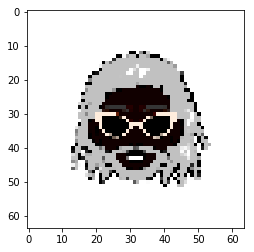

In [0]:
import matplotlib.pyplot as plt
plt.imshow((x_train[0]))


In [0]:
from keras.layers import *
from keras.models import Sequential,Model
from keras import backend as k
from keras.optimizers import Adam
import tensorflow
adam=Adam(lr=0.0002,beta_1=0.5)
init = initializers.RandomNormal(mean=0.0, stddev=0.02)

In [0]:
generator=Sequential()
generator.add(Dense(8*8*1024,input_shape=(100,)))

generator.add(LeakyReLU(0.2))
generator.add(Reshape((8,8,1024)))

genertor.add(upsampling2D())
generator.add(Conv2D(512,kernel_size=(5,5),strides=2,padding='same',activation='relu'))
generator.add(BatchNormalization(momentum=0.8, epsilon=0.00005))
#generator.add(LeakyReLU(0.2))
#generator.add(BatchNormalization())

generator.add(upsampling2D())
generator.add(Conv2D(256,kernel_size=(5,5),strides=2,padding='same',activation='relu'))
generator.add(BatchNormalization(momentum=0.8, epsilon=0.00005))
#generator.add(LeakyReLU(0.2))
#generator.add(BatchNormalization())


generator.add(upsampling2D())
generator.add(Conv2D(128,kernel_size=(5,5),strides=2,padding='same',activation='relu'))
generator.add(BatchNormalization(momentum=0.8, epsilon=0.00005))
#generator.add(LeakyReLU(0.2))
#generator.add(BatchNormalization())


generator.add(upsampling2D())
generator.add(Conv2D(64,kernel_size=(5,5),strides=2,padding='same',activation='relu'))
generator.add(BatchNormalization(momentum=0.8, epsilon=0.00005))
#generator.add(LeakyReLU(0.2))
#generator.add(BatchNormalization())




generator.add(Conv2D(3,kernel_size=(1,1),strides=1,padding='same',activation='tanh'))
generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

W0902 19:23:54.114310 140036072269696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0902 19:23:54.118193 140036072269696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0902 19:23:54.124484 140036072269696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0902 19:23:54.194440 140036072269696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0902 19:23:54.195448 1400360722

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 65536)             6619136   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 65536)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 1024)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 512)       13107712  
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 512)       2048      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 512)       0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 32, 32, 256)      

In [0]:
EPOCHS=300
BATCH_SIZE=64
NO_OF_BATCHES=int(X_train.shape[0]/(BATCH_SIZE))
HALF_BATCH_SIZE=32
NOISE_DIM=100

In [0]:
discriminator=Sequential()
discriminator.add(Conv2D(32,strides=(2,2),kernel_size=(5,5),padding='same',input_shape=(64,64,3),kernel_initializer=init))
discriminator.add(BatchNormalization(momentum=0.8, epsilon=0.00005))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Conv2D(64,strides=(2,2),kernel_size=(5,5),padding='same'))
discriminator.add(BatchNormalization(momentum=0.8, epsilon=0.00005))
discriminator.add(LeakyReLU(0.2))


discriminator.add(Conv2D(128,strides=(2,2),kernel_size=(5,5),padding='same'))
discriminator.add(BatchNormalization(momentum=0.8, epsilon=0.00005))
discriminator.add(LeakyReLU(0.2))


discriminator.add(Conv2D(256,strides=(2,2),kernel_size=(5,5),padding='same'))
discriminator.add(BatchNormalization(momentum=0.8, epsilon=0.00005))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Conv2D(512,strides=(1,1),kernel_size=(5,5),padding='same'))
discriminator.add(BatchNormalization(momentum=0.8, epsilon=0.00005))
discriminator.add(LeakyReLU(0.2))

#discriminator.add(Conv2D(1024,strides=(2,2),kernel_size=(5,5),padding='same'))
#discriminator.add(BatchNormalization(momentum=0.8, epsilon=0.00005))
#discriminator.add(LeakyReLU(0.2))



discriminator.add(Flatten())
discriminator.add(Dropout(0.3))



discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

W0902 19:24:08.579155 140036072269696 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)        

In [0]:
def showImages(epoch):
  noise=np.random.normal(0,1,size=(100,NOISE_DIM))
  generated_images=generator.predict(noise)
  generated_images=generated_images.reshape(-1,64,64,3)
  plt.figure(figsize=(40,40))
  for i in range(20):
    #indexing start from 1 in subplot (i+1)
    plt.subplot(30,30,i+1)
    plt.imshow((generated_images[i]))
    plt.axis("off")
  
  plt.show()
  plt.tight_layout()
  #plt.savefig("images/gan_output_{0}.jpg".format(epoch))
    
  
  

In [0]:
# GAN
#training a discriminator
import sys
discriminator.trainable=False
gan_input=Input(shape=(NOISE_DIM,))
generated_img=generator(gan_input)
gan_output=discriminator(generated_img)


model=Model(input=gan_input,output=gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 64, 64, 3)         24032131  
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 17475777  
Total params: 41,507,908
Trainable params: 24,030,211
Non-trainable params: 17,477,697
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 D Loss 64.6202 G loss 2253.9287 
Epoch 2 D Loss 27.4230 G loss 2514.4229 
Epoch 3 D Loss 27.0011 G loss 2514.4229 
Epoch 4 D Loss 26.8226 G loss 2514.4229 
Epoch 5 D Loss 26.4953 G loss 2514.4229 


W0902 19:39:44.846994 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 19:39:44.864467 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 19:39:44.879382 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 19:39:44.895624 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 19:39:44.911004 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 19:39:44.928900 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 19:39:44.946948 140036

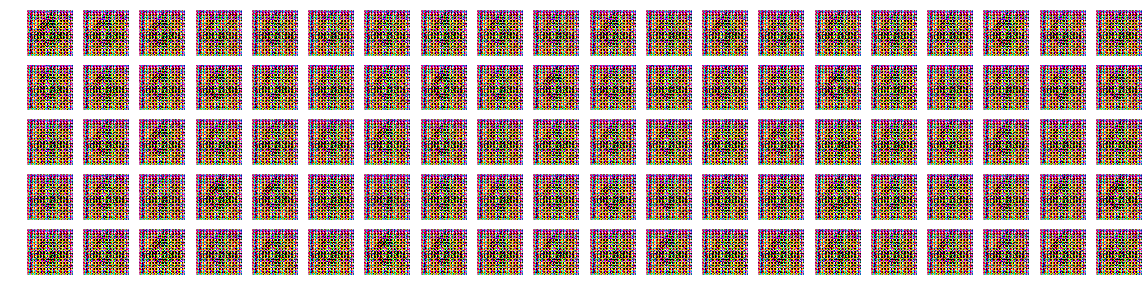

Epoch 6 D Loss 26.3146 G loss 2514.4229 
Epoch 7 D Loss 26.2037 G loss 2514.4229 
Epoch 8 D Loss 26.0927 G loss 2514.4229 
Epoch 9 D Loss 25.9685 G loss 2514.4229 
Epoch 10 D Loss 25.8897 G loss 2514.4229 


W0902 19:54:54.070871 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 19:54:54.090083 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 19:54:54.108802 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 19:54:54.126777 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 19:54:54.143312 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 19:54:54.162056 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 19:54:54.179376 140036

<Figure size 432x288 with 0 Axes>

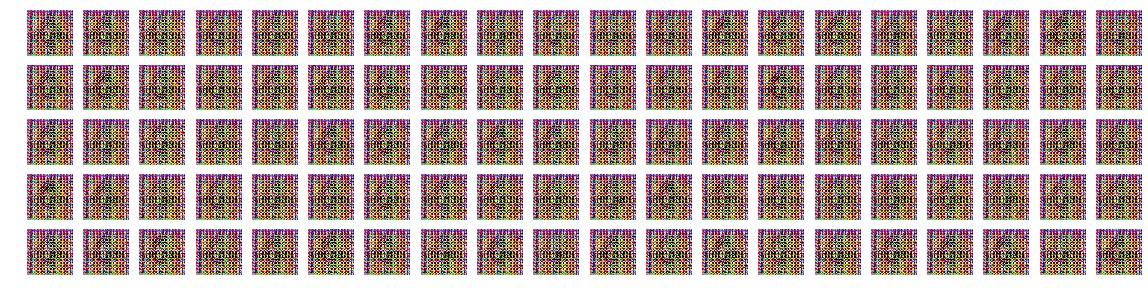

Epoch 11 D Loss 25.8811 G loss 2514.4229 
Epoch 12 D Loss 25.7744 G loss 2514.4229 
Epoch 13 D Loss 25.7033 G loss 2514.4229 
Epoch 14 D Loss 25.8459 G loss 2406.8738 
Epoch 15 D Loss 52.0539 G loss 1472.4619 


W0902 20:10:09.393117 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:10:09.410215 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:10:09.430350 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:10:09.451692 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:10:09.472537 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:10:09.492646 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:10:09.512161 140036

<Figure size 432x288 with 0 Axes>

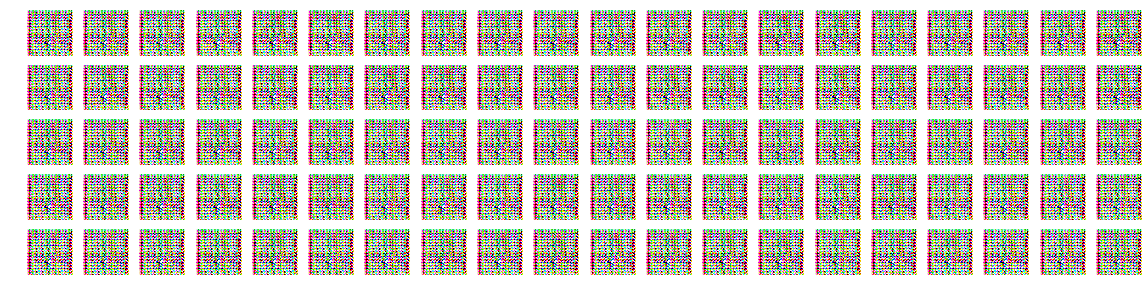

Epoch 16 D Loss 92.3571 G loss 573.5051 
Epoch 17 D Loss 106.7806 G loss 310.0727 
Epoch 18 D Loss 109.7010 G loss 285.7721 
Epoch 19 D Loss 106.0396 G loss 310.8577 
Epoch 20 D Loss 91.5888 G loss 355.6118 


W0902 20:25:57.601975 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:25:57.619598 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:25:57.637750 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:25:57.652548 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:25:57.669258 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:25:57.686565 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:25:57.703226 140036

<Figure size 432x288 with 0 Axes>

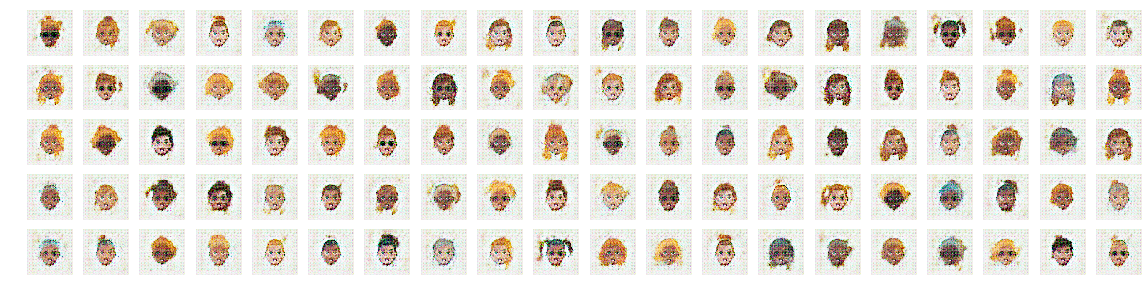

Epoch 21 D Loss 77.6875 G loss 428.8540 
Epoch 22 D Loss 65.3854 G loss 530.3070 
Epoch 23 D Loss 55.5815 G loss 558.2999 
Epoch 24 D Loss 49.1992 G loss 592.8857 
Epoch 25 D Loss 52.9942 G loss 604.3289 


W0902 20:41:44.692444 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:41:44.710118 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:41:44.726620 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:41:44.743944 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:41:44.758973 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:41:44.774173 140036072269696 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0902 20:41:44.789111 140036

<Figure size 432x288 with 0 Axes>

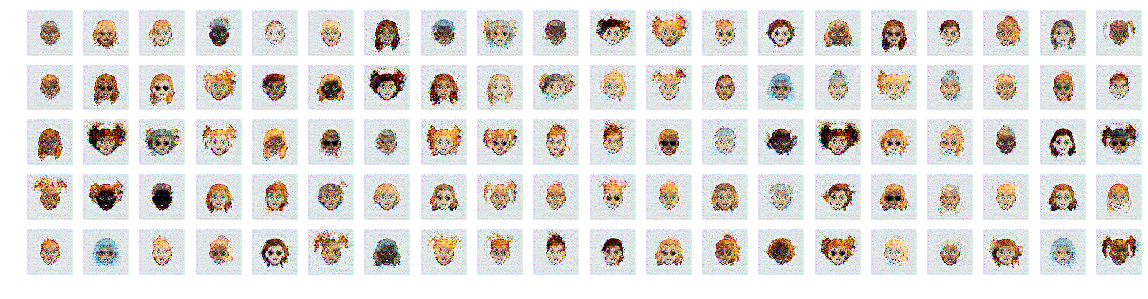

Epoch 26 D Loss 54.0840 G loss 633.6729 


In [0]:
for epoch in range(EPOCHS):
  epoch_g_loss=0
  epoch_d_loss=0
  for step in range(NO_OF_BATCHES):
    ##generating real images
    idx=np.random.randint(1,X_train.shape[0],HALF_BATCH_SIZE)
    real_imgs=X_train[idx]
    ##generating fake images assuming generator is frozen
    noise=np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
    fake_imgs=generator.predict(noise)
    ##labels
    real_y=np.ones((HALF_BATCH_SIZE,1))*0.9
    fake_y=np.zeros((HALF_BATCH_SIZE,1))
    ##training on discriminator
    d_real_loss=discriminator.train_on_batch(real_imgs,real_y)
    d_fake_loss=discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss=0.5*d_real_loss+0.5*d_fake_loss
    epoch_d_loss+=d_loss
    ##training on generator
    noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
    real_y1 = np.ones((BATCH_SIZE,1))
    ##why we consider model in this not generator
    g_loss=model.train_on_batch(noise,real_y1)
    epoch_g_loss+=g_loss
  print("Epoch %d D Loss %.4f G loss %0.4f "%((epoch+1),epoch_d_loss,epoch_g_loss)) 
  if((epoch+1)%5==0):
    #after every 5 epochs we are saving our model weights
    #generator.save("model/gen_{0}.h5".format(epoch))
    showImages(epoch)                            
  
  